Poniższy skrypt służy do analizy danych z pliku star_classification.csv. Badane są braki danych, rozkłady zmiennych, wykresy pudełkowe.
# Importowanie bibliotek

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
Dane zostały wczytane z plików csv stworzonych w skrypcie "Prepare_sets".

In [49]:
data = pd.read_csv("star_classification.csv")
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

# Analiza danych

### Podstawowe informacje o danych

Pierwsze pięć wierszy danych

In [50]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


Informacje na temat dannych w kategoriach: nazwa kolumny, ilość wartości niepustych, typ danych

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100001 non-null  float64
 1   alpha        100001 non-null  float64
 2   delta        100001 non-null  float64
 3   u            100001 non-null  float64
 4   g            100001 non-null  float64
 5   r            100001 non-null  float64
 6   i            100001 non-null  float64
 7   z            100001 non-null  float64
 8   run_ID       100001 non-null  int64  
 9   rerun_ID     100001 non-null  int64  
 10  cam_col      100001 non-null  int64  
 11  field_ID     100001 non-null  int64  
 12  spec_obj_ID  100001 non-null  float64
 13  class        100001 non-null  object 
 14  redshift     100001 non-null  float64
 15  plate        100001 non-null  int64  
 16  MJD          100001 non-null  int64  
 17  fiber_ID     100001 non-null  int64  
dtypes: float64(10), int64(7)

### Analiza braków danych
Brak braujących danych

In [52]:
data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

### Analiza rozkładów zmiennych
Kolejno: średnia, odchylenie standardowe, minimum, 25 percentyl, 50 percentyl, 75 percentyl, maksimum
Analizowane zbiory danych: cały zbiór, zbiór treningowy, zbiór testowy

In [53]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000010e+05,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.0,100001.000000,100001.000000,1.000010e+05,100001.000000,100001.000000,100001.000000,100001.000000
mean,1.237665e+18,177.630790,24.135060,22.213186,20.531369,19.645741,19.084834,18.668790,4481.398976,301.0,3.511595,186.129889,5.783881e+18,0.576657,5137.008940,55588.649004,449.310247
std,8.438519e+12,96.503210,19.644720,80.156675,31.750134,1.854763,1.757898,31.727994,1964.782341,0.0,1.586911,149.010461,3.324000e+18,0.730705,2952.288599,1808.475253,272.498182
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518745,5.146617,20.352370,18.965230,18.135730,17.732270,17.460640,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900873,23.645382,22.179140,21.099740,20.125270,19.405140,19.004590,4188.000000,301.0,4.000000,146.000000,5.614896e+18,0.424171,4987.000000,55868.000000,433.000000
75%,1.237668e+18,233.895006,39.901518,23.687560,22.123760,21.044780,20.396480,19.921120,5326.000000,301.0,5.000000,241.000000,8.331923e+18,0.704137,7400.000000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,23294.000000,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [54]:
X_train.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.0,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000
mean,1.237665e+18,177.618605,24.135563,22.251732,20.509752,19.649829,19.088856,18.647094,4483.020250,301.0,3.514175,185.656175,5.790430e+18,0.578483,5142.824913,55593.271437,449.330413
std,8.448081e+12,96.490263,19.674489,89.611382,35.483239,1.854714,1.758055,35.462139,1967.015476,0.0,1.588539,148.473162,3.321261e+18,0.733103,2949.856008,1805.569138,272.337784
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,10.068540,10.008650,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995793e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.519085,5.133722,20.355292,18.970710,18.140877,17.739005,17.464243,3185.000000,301.0,2.000000,82.000000,2.849748e+18,0.055325,2531.000000,54242.000000,221.000000
50%,1.237663e+18,180.957593,23.565264,22.184830,21.102795,20.130475,19.410450,19.009340,4192.000000,301.0,4.000000,146.000000,5.621749e+18,0.425586,4993.000000,55881.000000,433.000000
75%,1.237668e+18,233.954061,39.964100,23.696893,22.128707,21.045965,20.401798,19.923048,5326.000000,301.0,5.000000,240.000000,8.335157e+18,0.705603,7403.000000,56777.000000,644.000000
max,1.237681e+18,359.999810,83.000519,23294.000000,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [55]:
y_train.describe()

,'class'
count,80000.000000
mean,0.621500
std,0.816377
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [56]:
X_test.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,2.000100e+04,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.000000,20001.0,20001.000000,20001.000000,2.000100e+04,20001.000000,20001.000000,20001.000000,20001.000000
mean,1.237665e+18,177.679528,24.133045,22.059009,20.617832,19.629390,19.068743,18.755570,4474.914204,301.0,3.501275,188.024649,5.757690e+18,0.569352,5113.746213,55570.160192,449.229589
std,8.400316e+12,96.557373,19.525683,2.244001,2.041455,1.854915,1.757223,1.768671,1955.860323,0.0,1.580383,151.129357,3.334887e+18,0.721005,2961.958234,1819.980699,273.145607
min,1.237646e+18,0.013337,-17.451390,10.996230,10.730970,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.004255,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.516652,5.216959,20.338490,18.947400,18.122690,17.713070,17.441940,3187.000000,301.0,2.000000,82.000000,2.793531e+18,0.051473,2481.000000,54205.000000,218.000000
50%,1.237663e+18,180.733161,24.005000,22.162200,21.084480,20.106700,19.384850,18.986710,4188.000000,301.0,4.000000,147.000000,5.591493e+18,0.417862,4966.000000,55864.000000,432.000000
75%,1.237668e+18,233.644863,39.698138,23.646810,22.107170,21.041790,20.382040,19.913370,5323.000000,301.0,5.000000,243.000000,8.319524e+18,0.697714,7389.000000,56776.000000,645.000000
max,1.237681e+18,359.998965,82.947622,29.325650,28.903200,27.397090,30.163590,28.238290,8162.000000,301.0,6.000000,989.000000,1.412674e+19,6.983865,12547.000000,58932.000000,1000.000000


In [57]:
y_test.describe()

,'class'
count,20001.000000
mean,0.621419
std,0.818394
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


### Analiza liczności przewidywanych klas
Przewidywane klasy: GALAXY, QUASAR, STAR

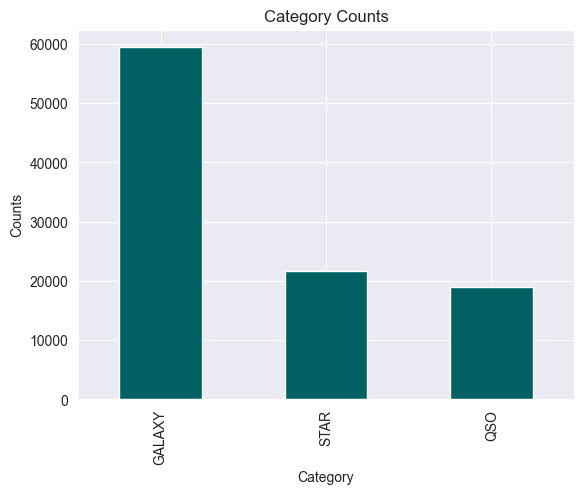

class
GALAXY    59446
STAR      21594
QSO       18961
Name: count, dtype: int64

In [58]:
d_category_count = data["class"].value_counts()
d_category_count.plot(kind="bar", color="#016064")
plt.title("Category Counts")
plt.xlabel("Category")
plt.ylabel("Counts")
plt.show()
d_category_count

## Boxploty

### Boxploty dla poszczególnych atrybutów w zbiorze danych treningowych

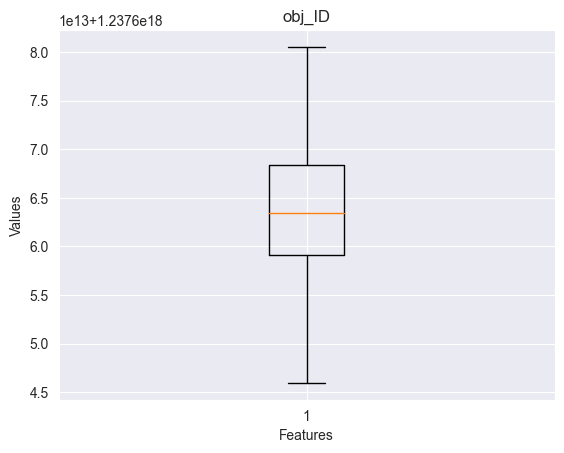

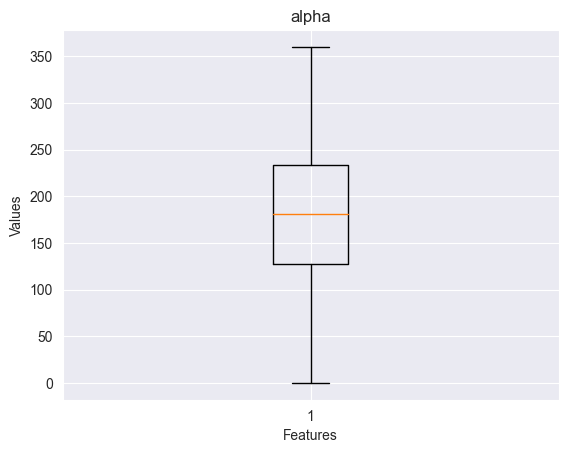

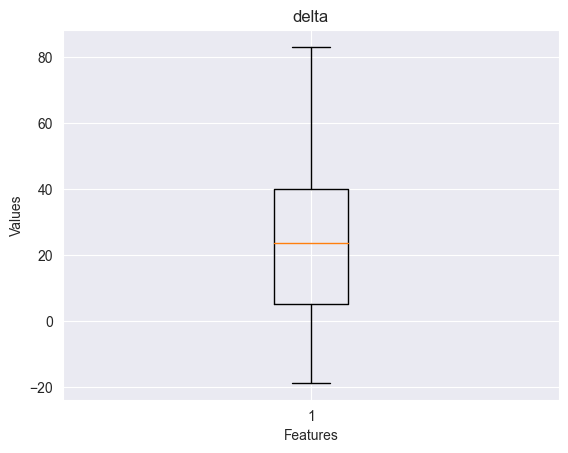

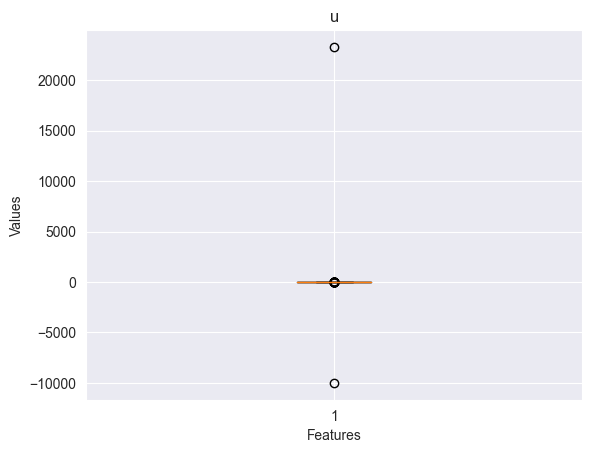

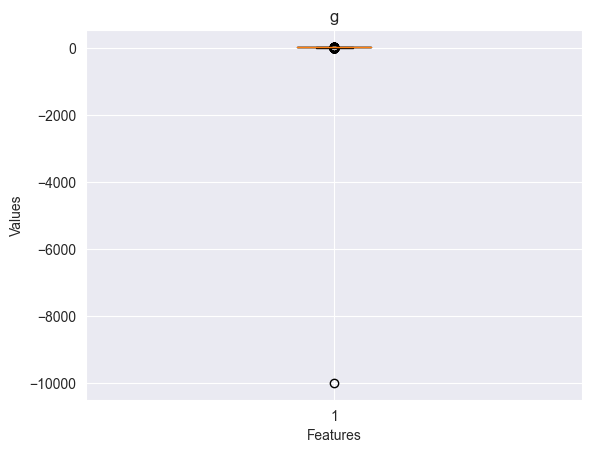

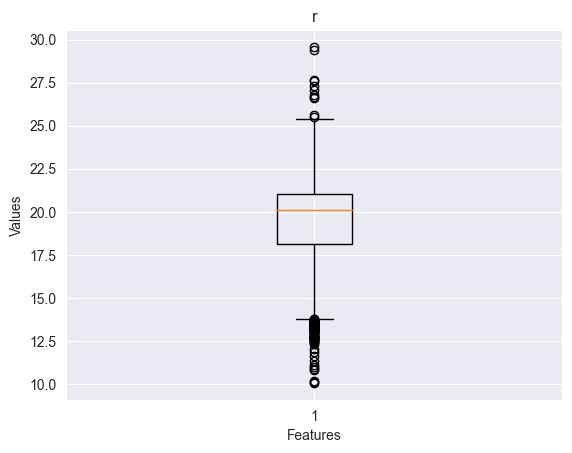

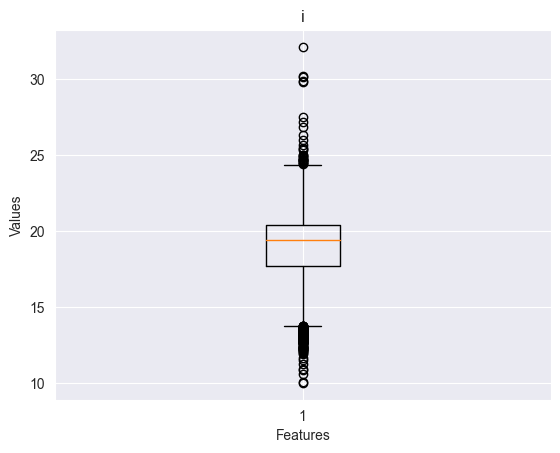

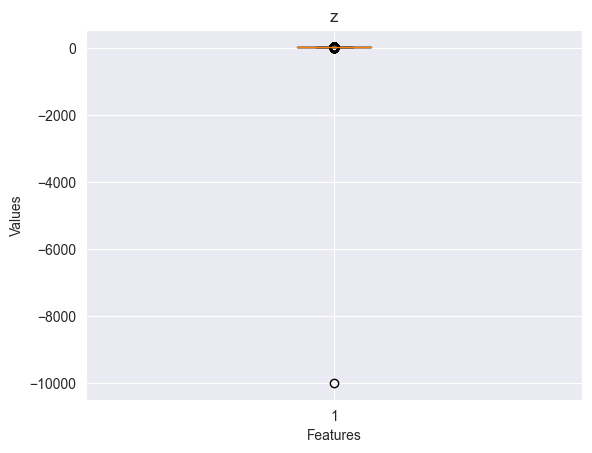

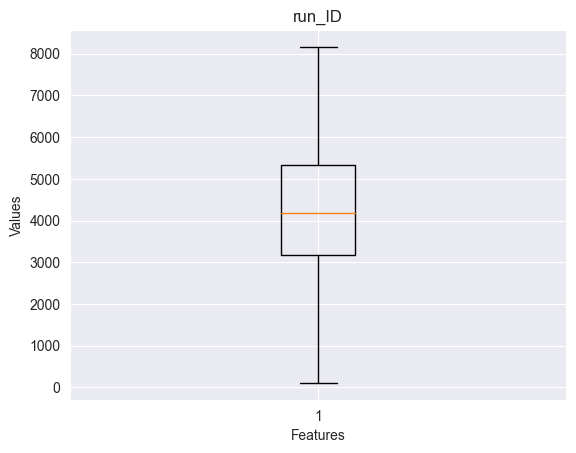

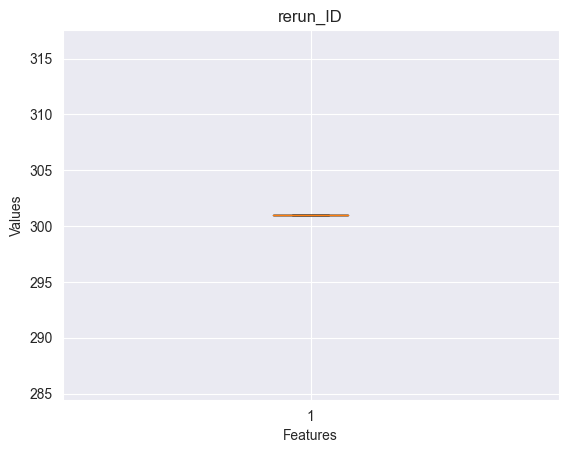

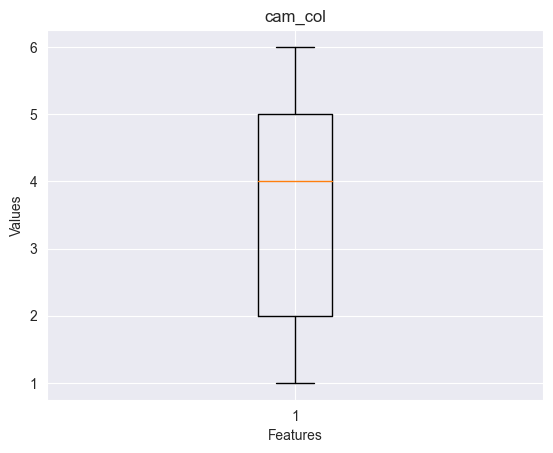

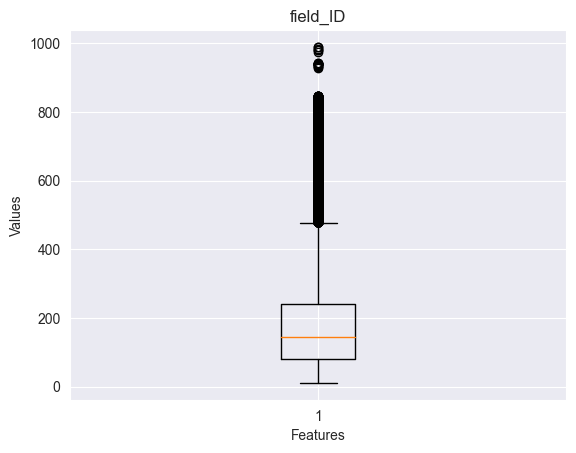

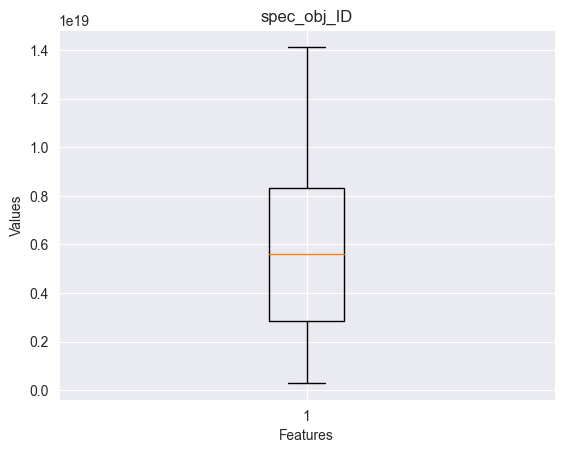

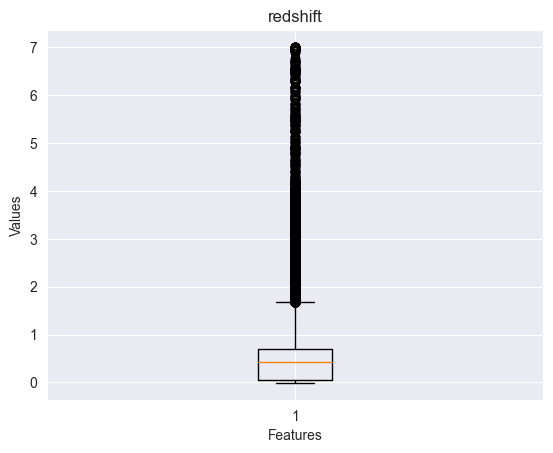

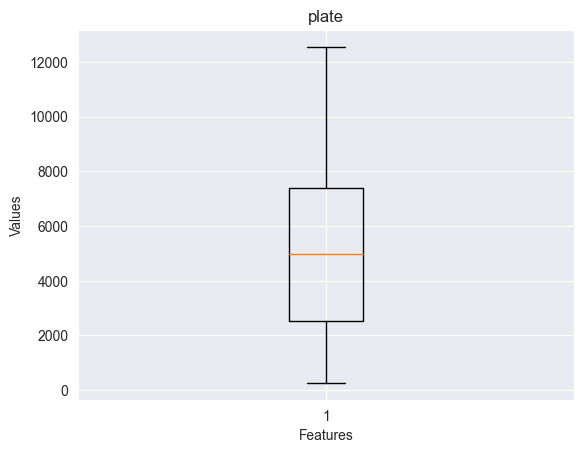

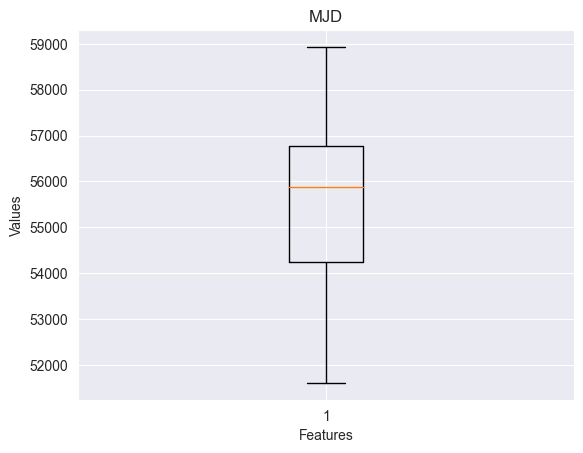

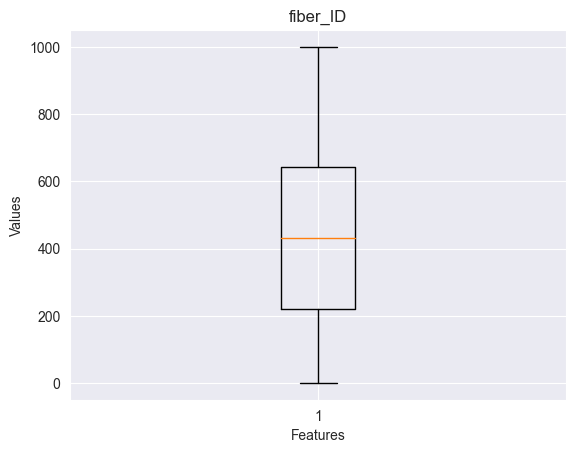

In [59]:
for column in X_train.columns:
    plt.figure()
    plt.boxplot(X_train[column])
    plt.title(column)
    plt.xlabel("Features")
    plt.ylabel("Values")

### Boxploty dla poszczególnych atrybutów w zbiorze wszystkich danych

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

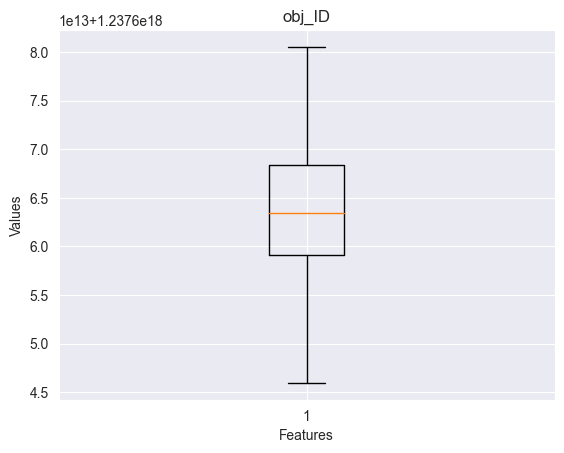

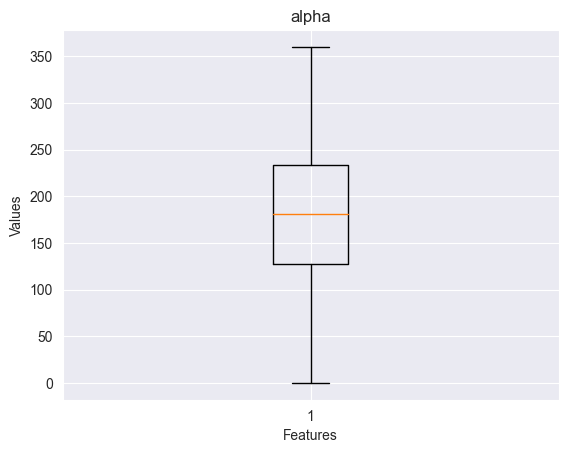

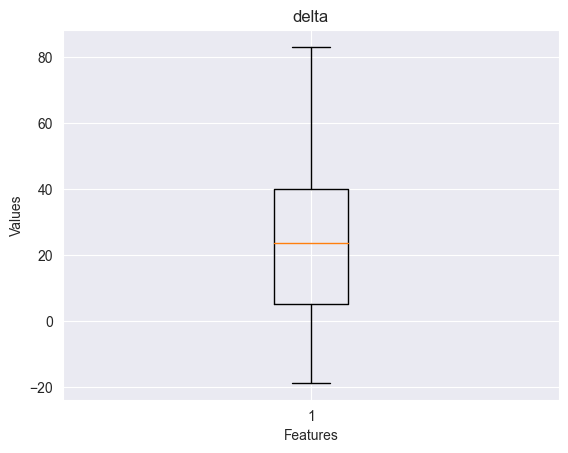

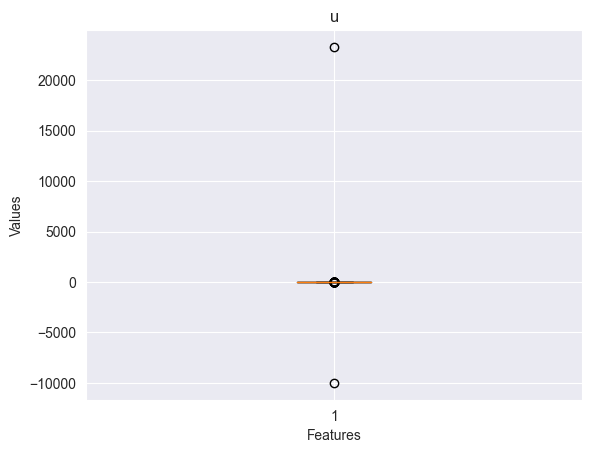

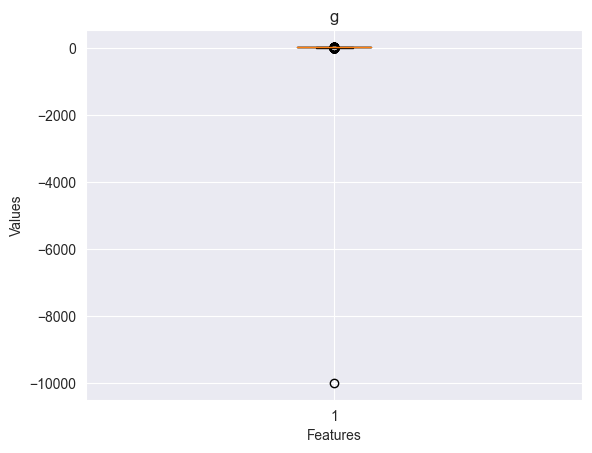

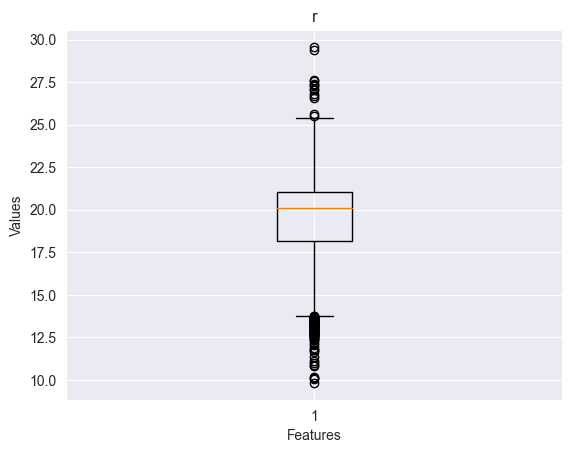

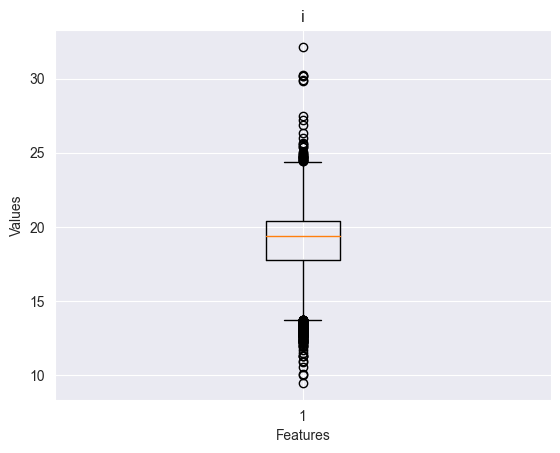

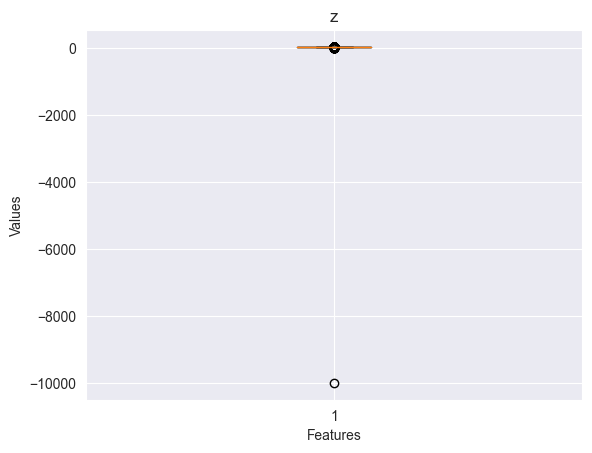

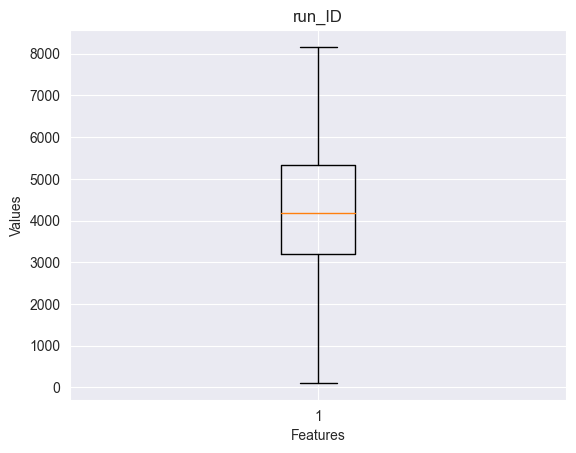

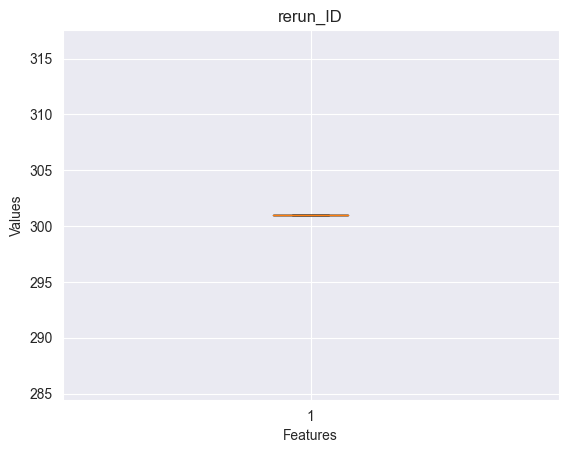

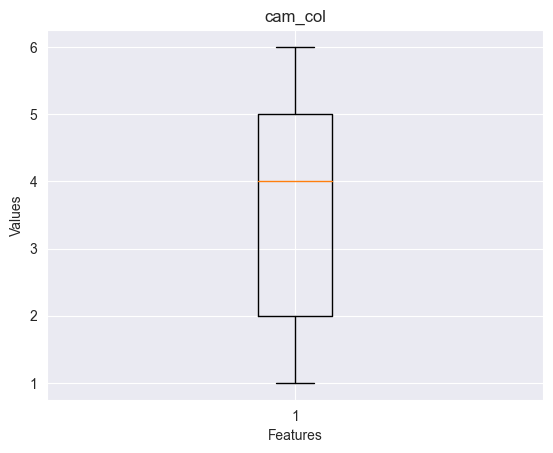

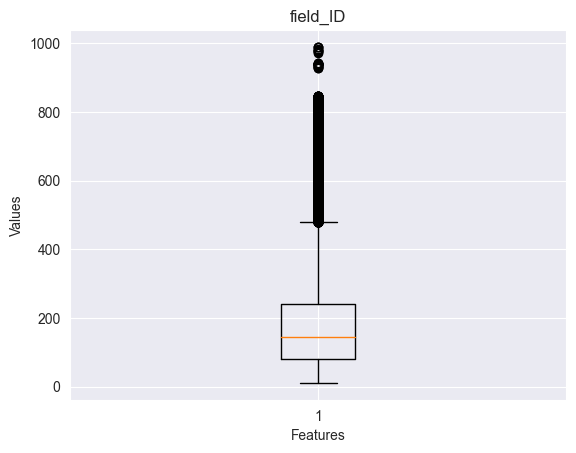

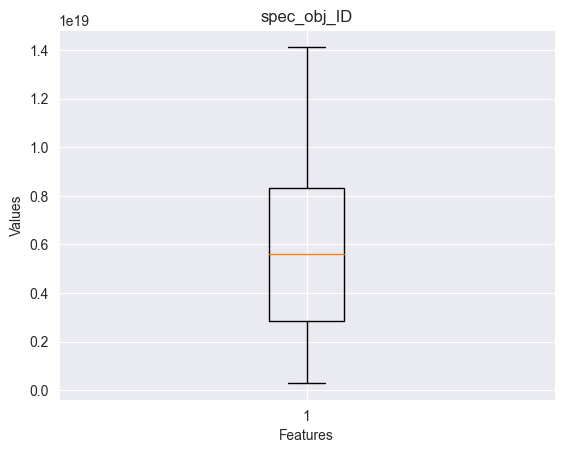

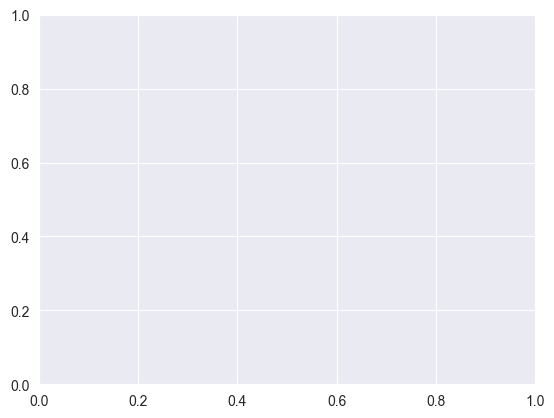

In [60]:
for column in data.columns:
    plt.figure()  # Create a new figure for each boxplot
    plt.boxplot(data[column])
    plt.title(column)  # Set the title as the column name
    plt.xlabel("Features")  # Customize the x-axis label if needed
    plt.ylabel("Values")  # Customize the y-axis label if needed

# Histogramy dla poszczególnych atrybutów w zbiorze danych treningowych

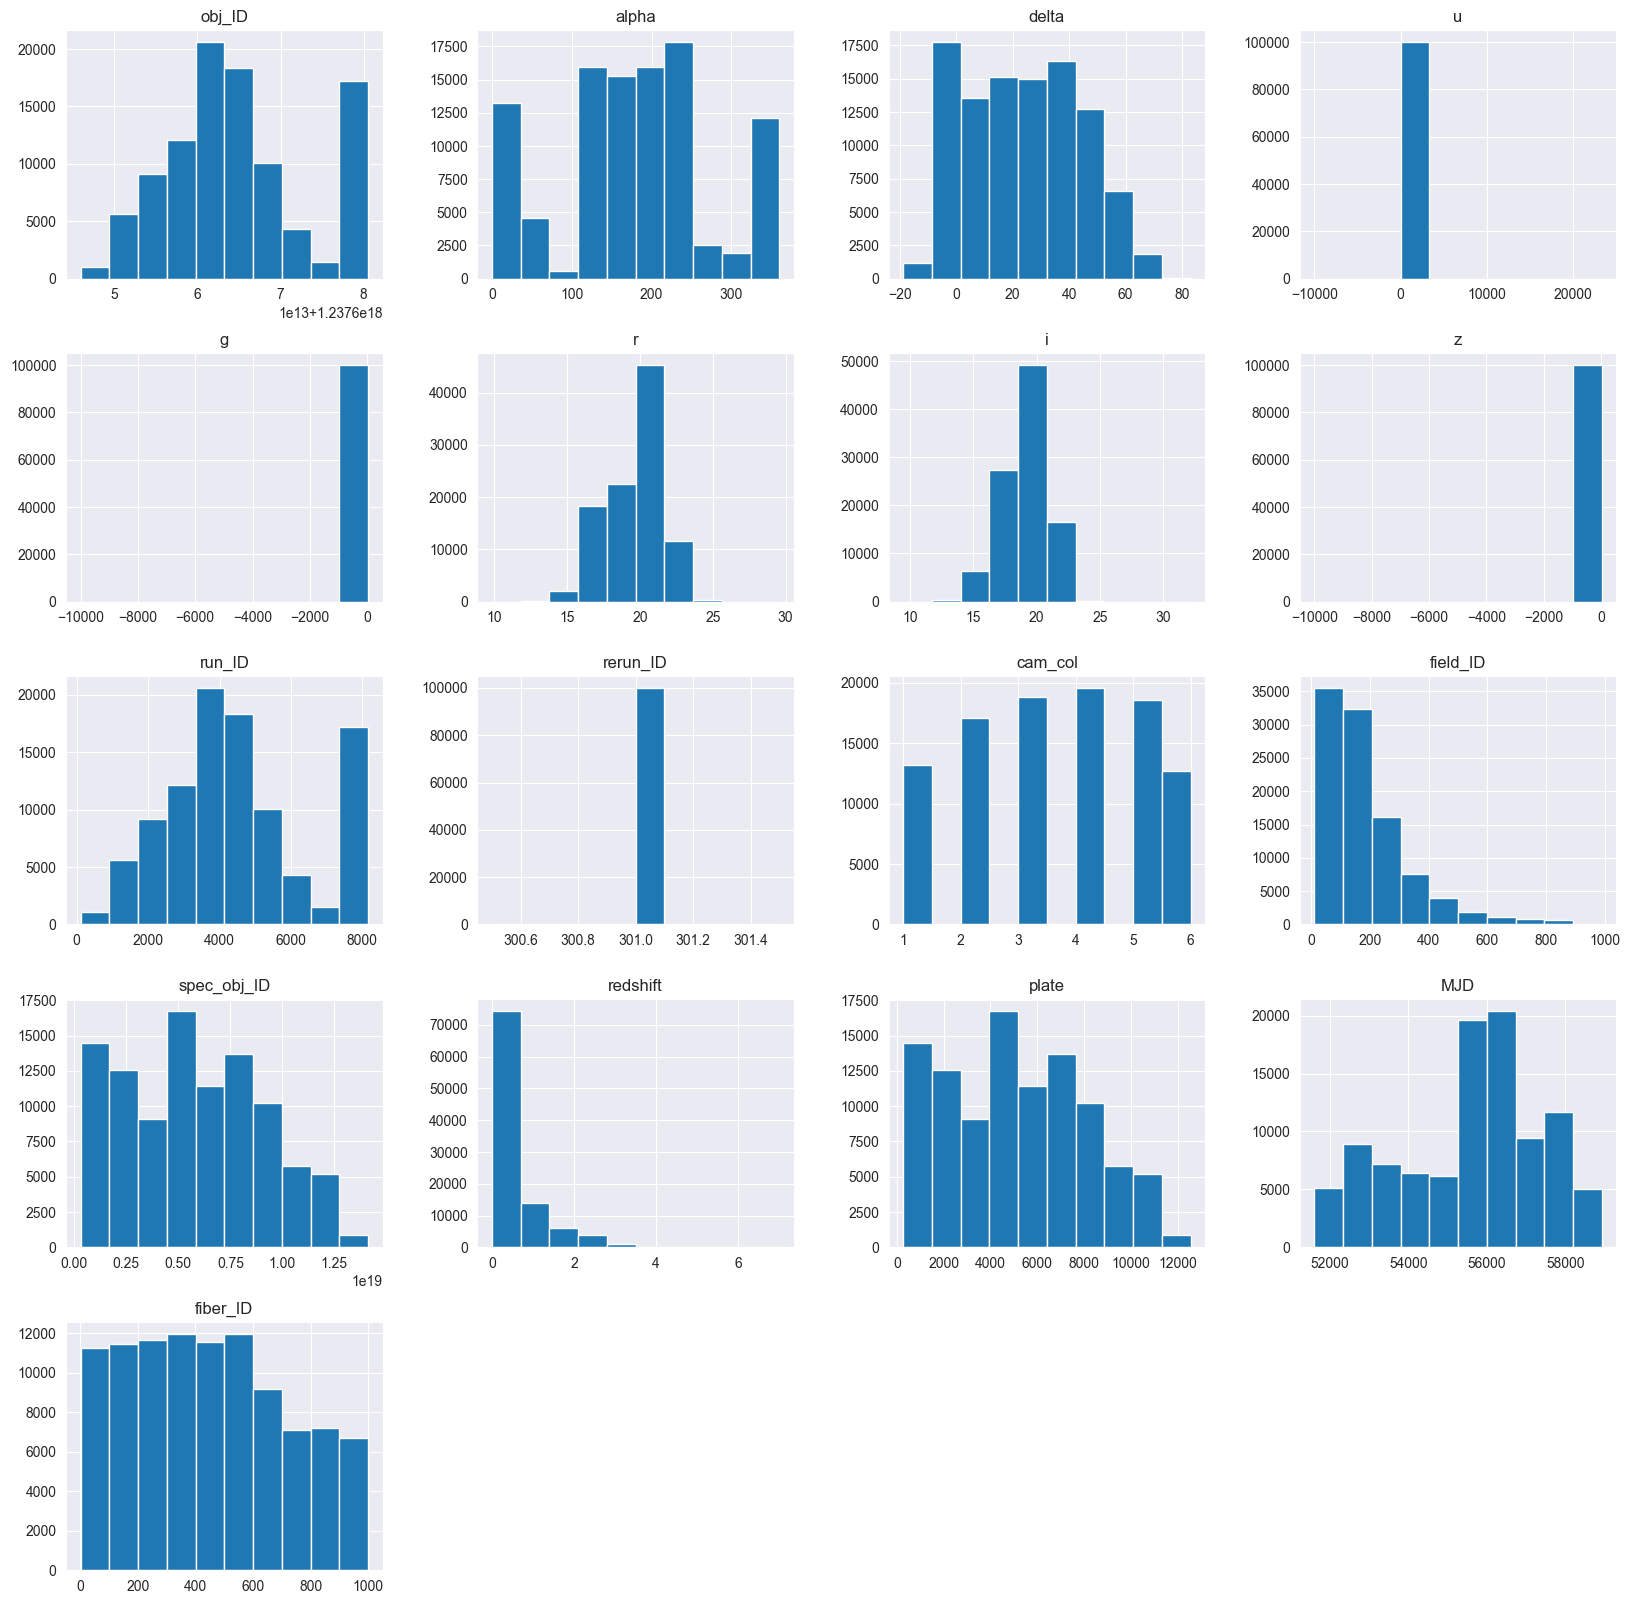

In [61]:
data.hist(figsize=(20, 20))
plt.show()

# Histogramy dla poszczególnych atrybutów w zbiorze wszystkich danych

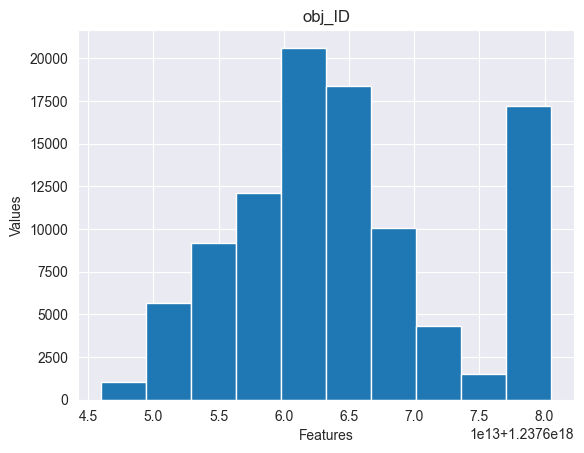

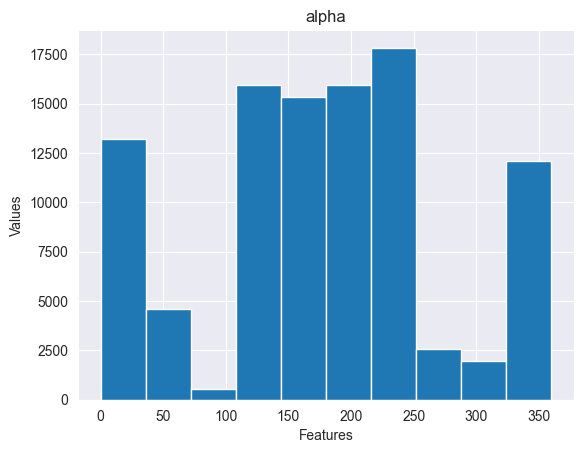

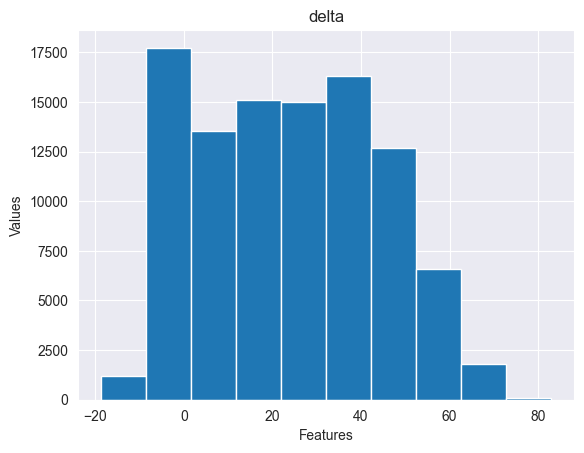

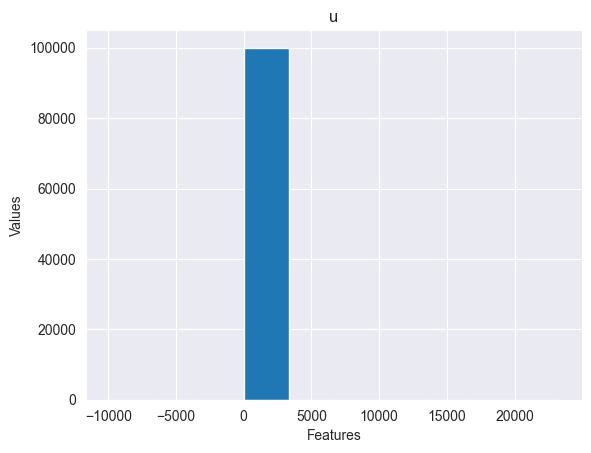

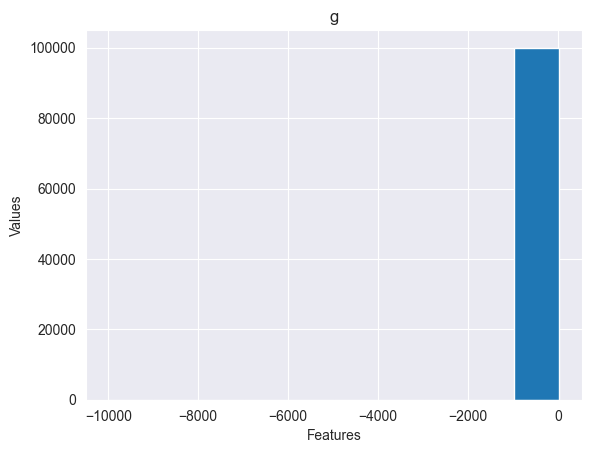

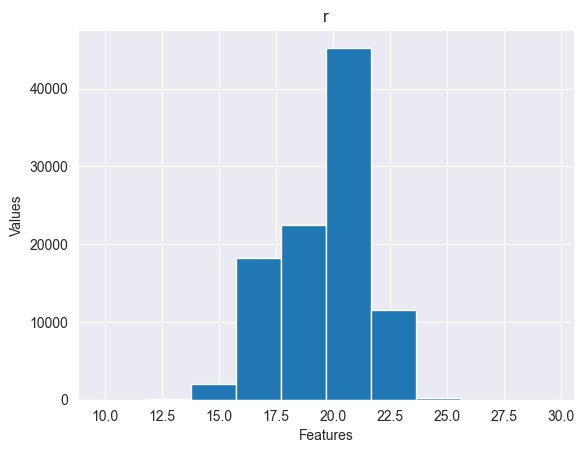

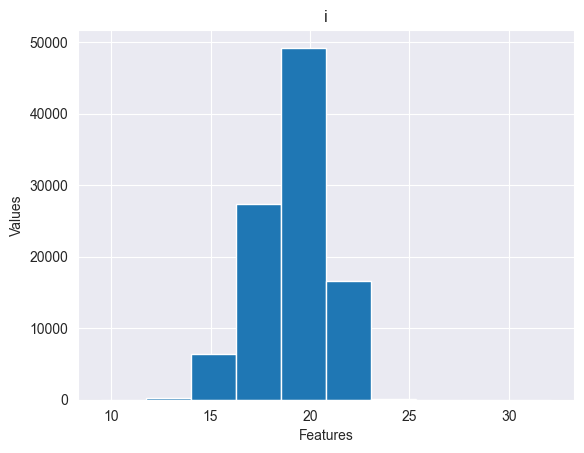

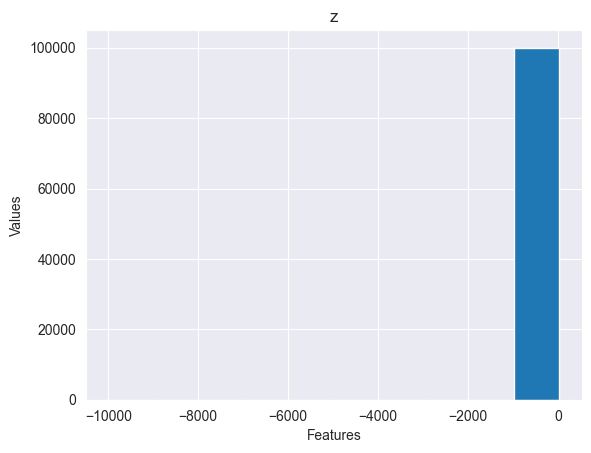

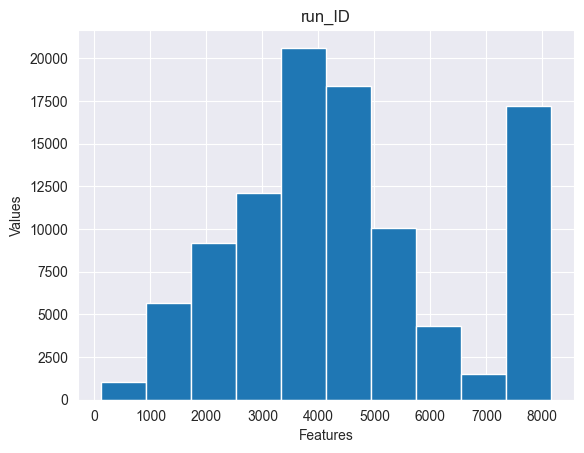

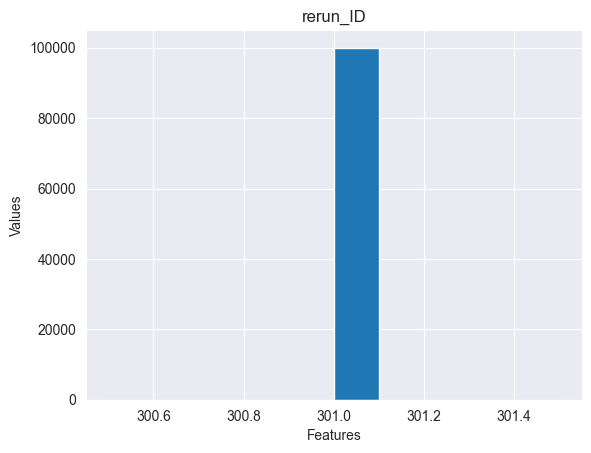

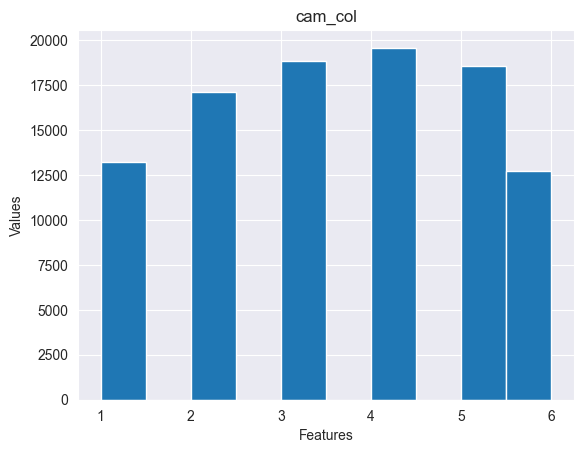

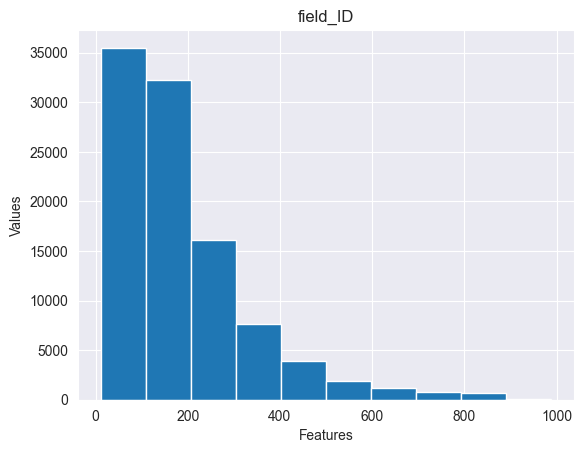

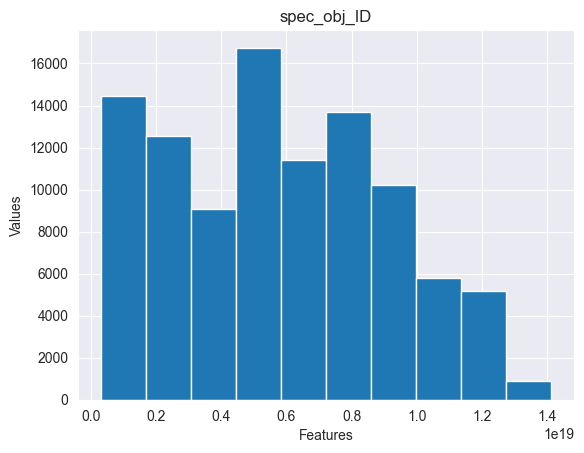

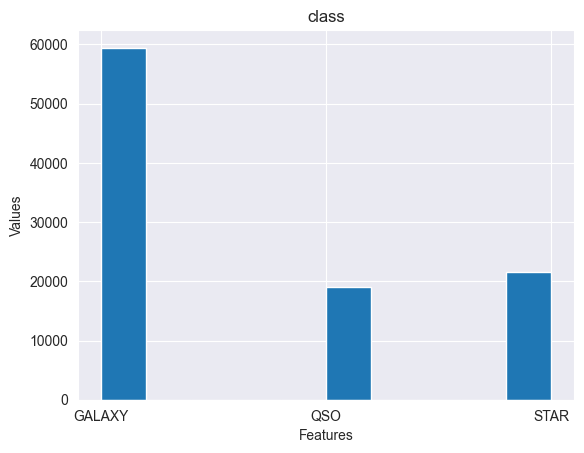

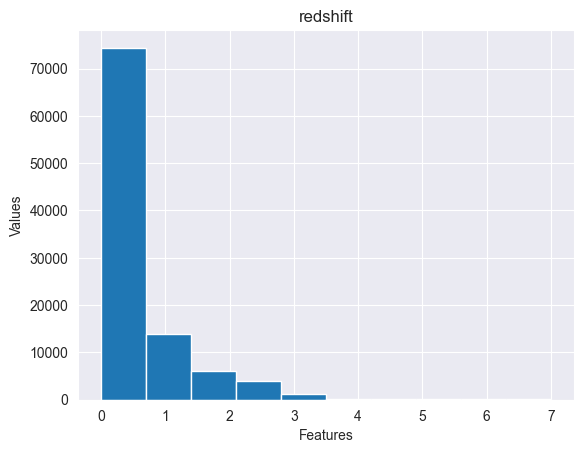

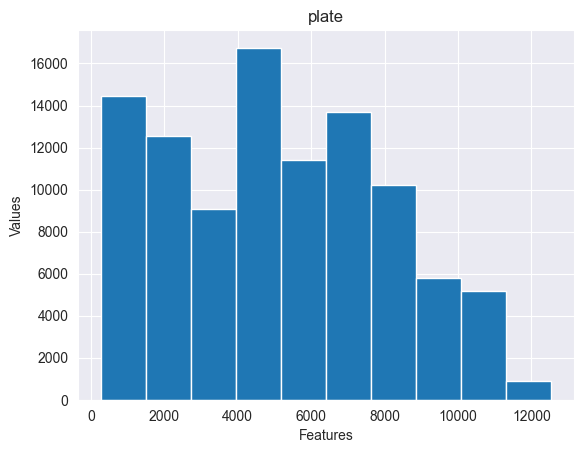

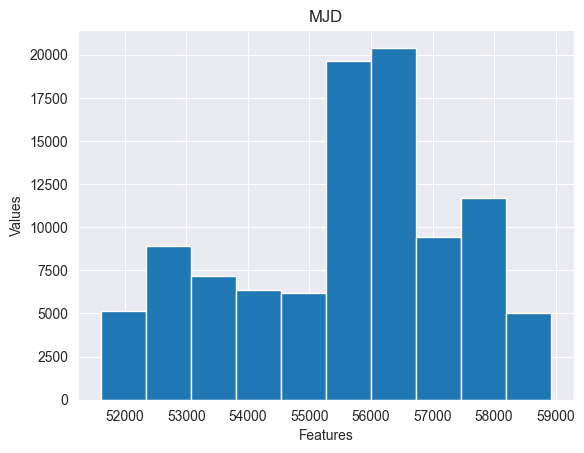

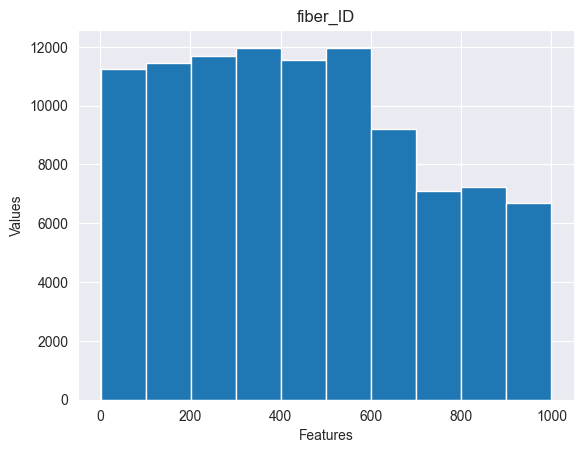

In [62]:
for column in data.columns:
    plt.figure()
    plt.hist(data[column])
    plt.title(column)
    plt.xlabel("Features")
    plt.ylabel("Values")

# Histogramy z linią trendu(możliwe, że są złe)

ValueError: num must be an integer with 1 <= num <= 15, not 16

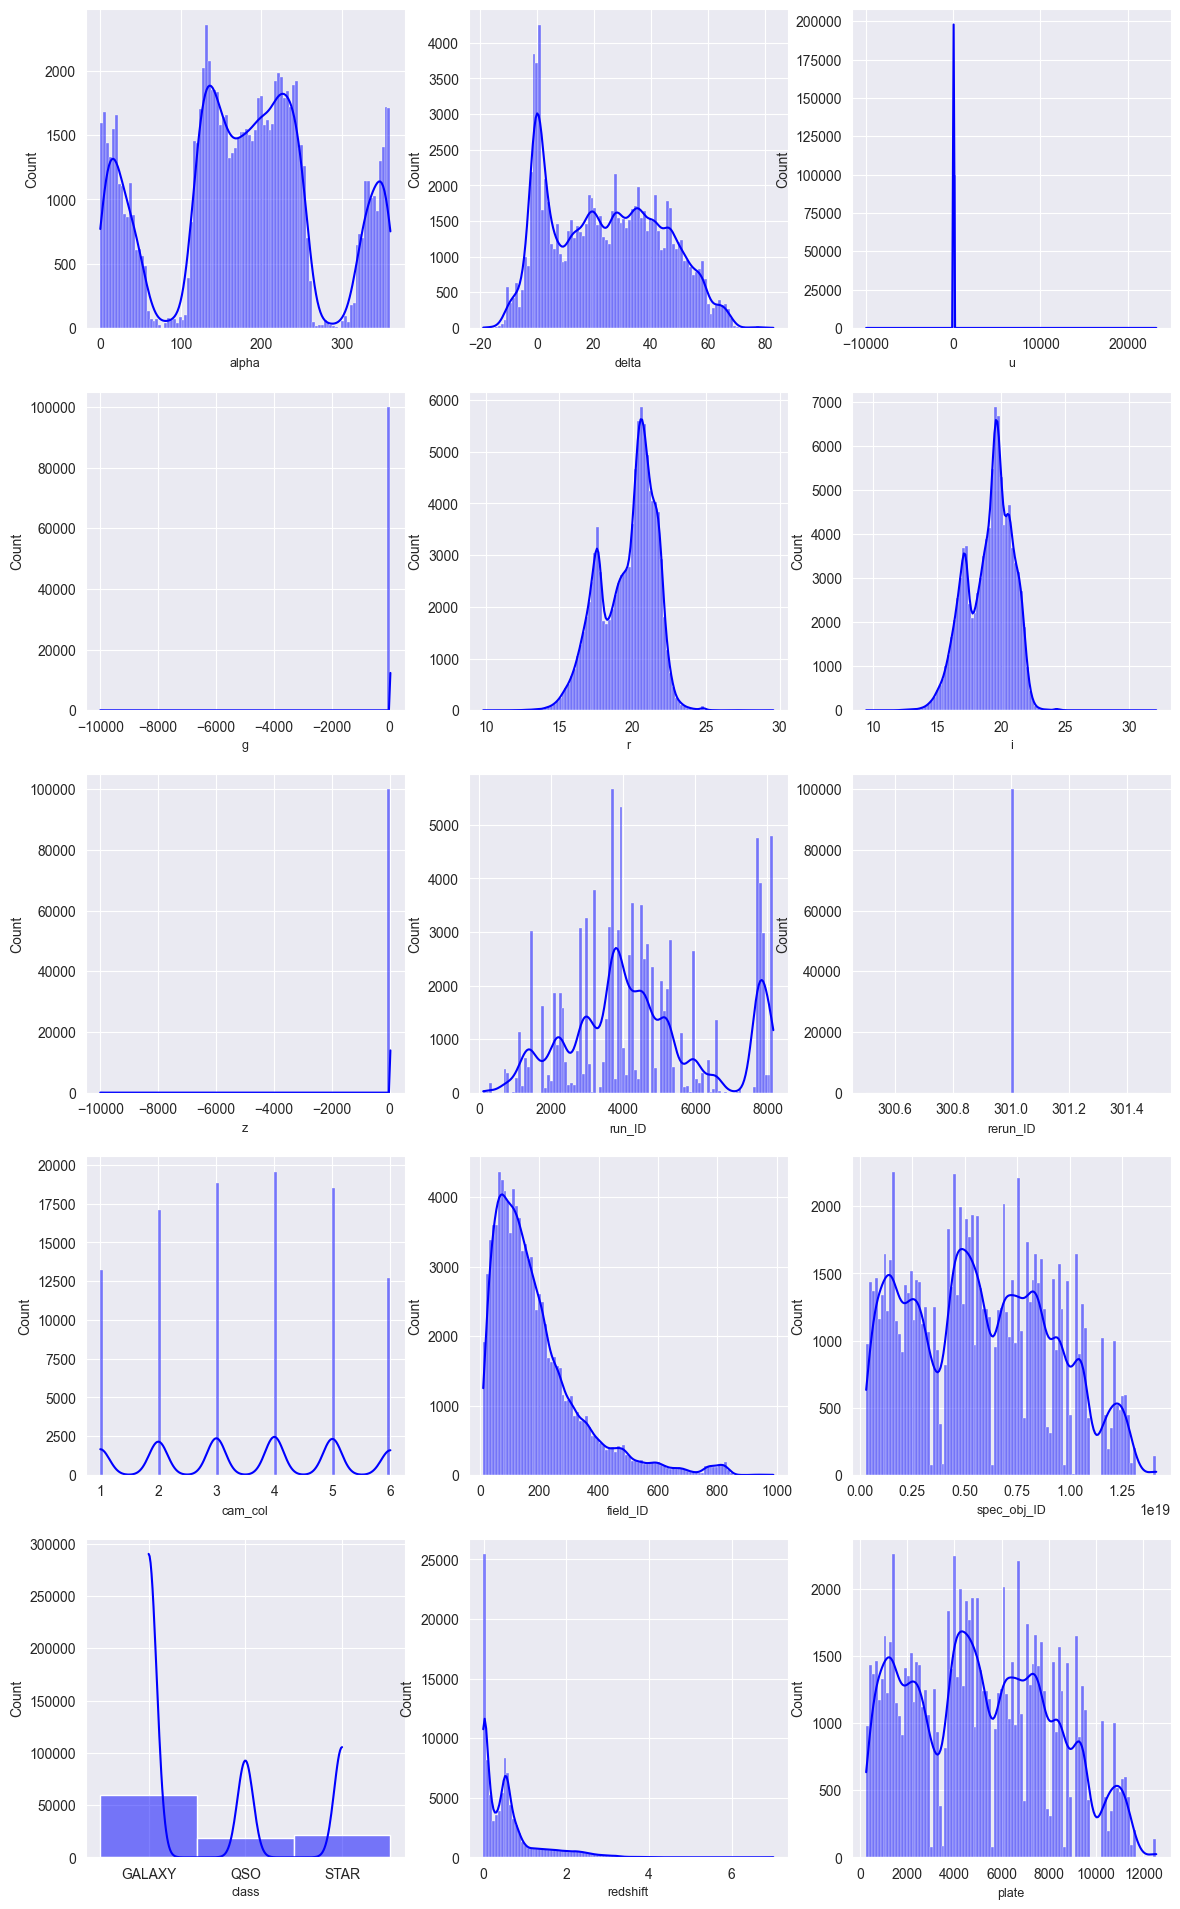

In [63]:
data = data.drop(columns=["obj_ID"])
fig, ax = plt.subplots(5, 3, figsize=(14, 24))
i=0
for i, feature in enumerate(data):
    plt.subplot(5, 3, i+1)
    sns.histplot(data[feature],
                 color="blue",
                 kde=True,
                 bins=100)
    plt.xlabel(feature, fontsize=9)
plt.show()